# Assignment03 : K-mean Algorithm in Python
# Name : Joonoh-Oh
# Student-ID : 20146136

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
#Name: joonoh-oh
#Student-ID: 20146136

# Function for defining x and y values

In [2]:
def inputData(xmin, xmax):
    
    x = np.arange(xmin, xmax, 0.3)
    
    np.random.shuffle(x)
    
    y = np.arange(xmin, xmax, 0.3)
    np.random.shuffle(y)
    
    return x, y

# Function for labeling initial points

In [3]:
def initialLabel(x, k):
    length = len(x)
    
    labels = np.empty(length)
    
    for i in range(0, length):
        labels[i] = random.choice(range(1,k+1))
    
    return labels;

# Function for setting inital centers of initial points

In [4]:
def initialCentroid(x, y, labels, k):
    
    length = len(x)
    
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)
    center_x = np.zeros(k)
    center_y = np.zeros(k)
    count = np.zeros(k)
    
    label = list(range(1, k+1))
    
    for i in range(0, length):     
        for j in range(0,k):
            if(labels[i] == label[j]):
                count[j] += 1
                sum_x[j] += x[i]
                sum_y[j] += y[i]
    for i in range(0,k):            
        center_x[i] = sum_x[i] / count[i]
        center_y[i] = sum_y[i] / count[i]
    return center_x, center_y

# Function for setting new labels

In [5]:
def finalLabel(x, y, center_x, center_y, k):
    length = len(x)
    
    labels = np.empty(length);
    
    dist = np.empty(k);
    
    
    for i in range(0, length):
        min_idx = 0
        for j in range(0,k):
            dist[j] = np.sqrt((x[i] - center_x[j])**2 + (y[i] - center_y[j])**2)
            if(dist[j] <= dist[min_idx]):
                min_idx = j
        labels[i] = min_idx + 1
    
    return labels;

# Function for get new centers according to new labels

In [6]:
def finalCentroid(x, y, labels, k):
    length = len(x)
    
    sum_x = np.zeros(k)
    sum_y = np.zeros(k)
    center_x = np.zeros(k)
    center_y = np.zeros(k)
    count = np.zeros(k)
    
    label = list(range(1, k+1))
    
    for i in range(0, length):     
        for j in range(0,k):
            if(labels[i] == label[j]):
                count[j] += 1
                sum_x[j] += x[i]
                sum_y[j] += y[i]
    for i in range(0,k):            
        center_x[i] = sum_x[i] / count[i]
        center_y[i] = sum_y[i] / count[i]
    return center_x, center_y

# Function for calculating energy(error)

In [7]:
def calculateEnergy(x, y, o_center_x, o_center_y, f_center_x, f_center_y, o_labels, f_labels):
    
    length = len(x)
    
    o_energy = 0
    
    f_energy = 0
    
    label = list(range(1, k+1))
    
    for i in range(0, length):     
        for j in range(0,k):
            if(o_labels[i] == label[j]):
                o_energy += np.sqrt((x[i] - center_x[j])**2 + (y[i] - center_y[j])**2)
    
    for i in range(0, length):     
        for j in range(0,k):
            if(f_labels[i] == label[j]):
                f_energy += np.sqrt((x[i] - f_center_x[j])**2 + (y[i] - f_center_y[j])**2)
    
    
    energy = o_energy - f_energy
    
    return energy

# Define the x, y scale

In [8]:
x_max = 10
x_min = -10

y_max = 10
y_min = 10

# Determine the number for categorizing. In this code, k = 3.

In [9]:
k = 3

# Plot defined points.

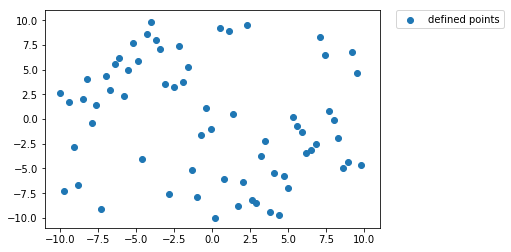

In [10]:
x, y = inputData(x_min, x_max)

plt.figure(1)

plt.scatter(x,y, marker='o', label='defined points')

plt.xlim(x_min - 1, x_max + 1)
plt.ylim(x_min - 1, x_max + 1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()


# Run k-mean alogirithm and print the energy each time.

In [11]:
f_labels = initialLabel(x, k)

f_center_x, f_center_y = initialCentroid(x, y, f_labels, k)


while True:
    
    labels = f_labels;

    center_x, center_y = f_center_x, f_center_y;

    f_labels = finalLabel(x, y, f_center_x, f_center_y, k)

    f_center_x, f_center_y = finalCentroid(x, y, f_labels, k)
    
    energy = calculateEnergy(x, y, center_x, center_y, f_center_x, f_center_y, labels, f_labels)
    print(energy)
    if(energy <= 0):
        break;

220.1850997793436
4.474780693251773
1.3961472127816705
3.272853357299084
0.4479539282945666
2.238181055461098
1.1973426260933024
1.1379114896022884
5.594821956257931
1.9079892298640857
0.0


# Visualize the final result of clustering through the graph.

(-11, 11)

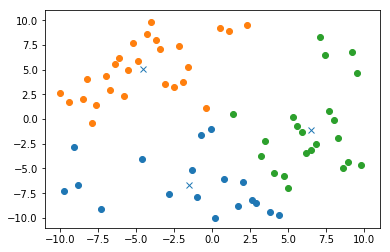

In [12]:
plt.figure(1)
label = list(range(1, k+1))

for i in range(1, k+1):
    plt.scatter(x[f_labels==i],y[f_labels==i], marker='o', label='cluster %d' %i)

    
plt.plot(f_center_x, f_center_y, 'x', label='center')

plt.xlim(x_min - 1, x_max + 1)
plt.ylim(x_min - 1, x_max + 1)

# Link to Github: https://github.com/jooh95/assignment03